<a href="https://colab.research.google.com/github/jrangelg/Artificial-intelligence/blob/main/CadenaPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIMULACIÓN CADENA DE MARKOV EN TIEMPO DISCRETO

Una cadena de Markov es un modelo estocástico que describe una secuencia de eventos donde la probabilidad de que ocurra un evento futuro depende únicamente del estado actual y no de los estados anteriores que condujeron a ese estado actual. Estos procesos reciben el nombre en honor al matemático ruso Andrey Markov.

En una cadena de Markov, se utilizan transiciones de estado para representar cómo un sistema se mueve de un estado a otro, y se asume que la probabilidad de transición depende solo del estado presente y no de la secuencia de eventos que llevó a ese estado. Esto se conoce como la propiedad de Markov o la propiedad sin memoria.

Las cadenas de Markov se utilizan en una amplia variedad de campos, como la modelización de sistemas financieros, análisis de series temporales, reconocimiento de patrones, procesamiento de señales, aprendizaje automático, entre otros. Son especialmente útiles en situaciones donde se asume que el futuro depende principalmente del estado presente y no de una larga historia pasada.

Secuencia Simulada: [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]


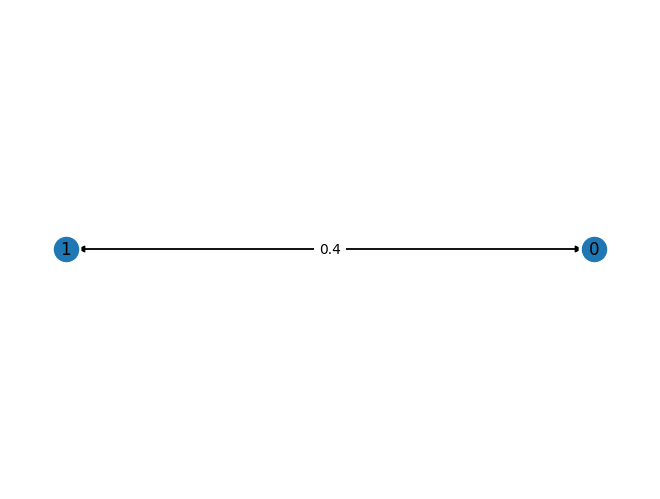

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def simular_cadena_markov_grafo(grafo, estado_inicial, num_pasos):
    secuencia_estados = [estado_inicial]

    for _ in range(num_pasos):
        # Obtener vecinos y probabilidades de transición desde el estado actual
        vecinos = list(grafo.neighbors(estado_inicial))
        probabilidades = [grafo[estado_inicial][vecino]['probabilidad'] for vecino in vecinos]

        # Elegir el próximo estado basado en las probabilidades de transición
        nuevo_estado = np.random.choice(vecinos, p=probabilidades)

        # Actualizar el estado actual
        estado_inicial = nuevo_estado

        # Almacenar el estado en la secuencia
        secuencia_estados.append(estado_inicial)

    return secuencia_estados

# Ejemplo de uso:
G = nx.DiGraph()
G.add_nodes_from([0, 1])
G.add_edge(0, 1, probabilidad=0.3)
G.add_edge(0, 0, probabilidad=0.7)
G.add_edge(1, 0, probabilidad=0.4)
G.add_edge(1, 1, probabilidad=0.6)

estado_inicial = 0
num_pasos = 10

# Simular la cadena de Markov utilizando el grafo
secuencia_simulada = simular_cadena_markov_grafo(G, estado_inicial, num_pasos)
print("Secuencia Simulada:", secuencia_simulada)

# Dibujar el grafo
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True)
labels = nx.get_edge_attributes(G, 'probabilidad')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
